[パロンドのパラドックス【世界のヨコサワ×ヨビノリ】](https://www.youtube.com/watch?v=b3g4sn5ZSnM) が面白かったのでシミュレーションした

ざっくりまとめると
* ゲームA: 期待値が負の賭け
* ゲームB: 期待値が負の賭け
* ゲームC: 50%の確率でゲームA, 50%の確率でゲームBをやる
  * うまくゲームAとゲームBを設定すると、このゲームCの期待値を正にできる　詳細は動画を参照

In [1]:
import random
random.seed(1337)
from typing import Callable

import numpy as np

In [2]:
def game_A(*args) -> int:
    if random.randint(1, 100) <= 48:
        return +1
    else:
        return -1

def game_B(m) -> int:
    win_p = 85 if m % 3 else 1
    if random.randint(1, 100) <= win_p:
        return +1
    else:
        return -1

def game_C(m) -> int:
    game = game_A if random.randint(0, 1) else game_B
    return game(m)

def do_game(game:Callable, n:int, initial_m:int=0) -> np.ndarray:
    a = np.ndarray(n, dtype=np.int64)
    m = a[0] = initial_m
    for i in range(1, n):
        m += game(m)
        a[i] = m
    return a

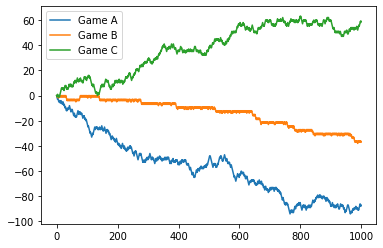

In [3]:
import matplotlib.pyplot as plt

N = 1000
INIT = 0
A = do_game(game_A, N, INIT)
B = do_game(game_B, N, INIT)
C = do_game(game_C, N, INIT)
plt.plot(A, label="Game A")
plt.plot(B, label="Game B")
plt.plot(C, label="Game C")
plt.legend()
plt.show()


なーほーね